In [16]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers

### Binary classification example (IMDB sentiment analysis).

In this example, I classify movie reviews as positive or negative, based on the context of the reviews.

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=3000)

In [23]:
def vectorize_sequences(sequences, dimension=3000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
x_train = x_train[0:10000]
y_train = y_train[0:10000]
x_test = x_test[0:10000]
y_test = y_test[0:10000]

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
                loss = 'binary_crossentropy', 
                 metrics=['accuracy'])

In [9]:
x_val = x_train[:3000]
partial_x_train = x_train[3000:]

In [10]:
y_val = y_train[:3000]
partial_y_train = y_train[3000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/10
14/14 [==============================] - 3s 163ms/step - loss: 0.6111 - accuracy: 0.7091 - val_loss: 0.5373 - val_accuracy: 0.7567
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.4589 - accuracy: 0.8427 - val_loss: 0.4409 - val_accuracy: 0.8327
Epoch 3/10
14/14 [==============================] - 0s 10ms/step - loss: 0.3709 - accuracy: 0.8796 - val_loss: 0.3882 - val_accuracy: 0.8443
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.3139 - accuracy: 0.9013 - val_loss: 0.3538 - val_accuracy: 0.8567
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 0.2717 - accuracy: 0.9086 - val_loss: 0.3363 - val_accuracy: 0.8627
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.2370 - accuracy: 0.9250 - val_loss: 0.3363 - val_accuracy: 0.8590
Epoch 7/10
14/14 [==============================] - 0s 7ms/step - loss: 0.2152 - accuracy: 0.9311 - val_loss: 0.3339 - val_accuracy: 0.8633
Epoch 8/10
14/14 

In [12]:
history_dict = history.history

In [13]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

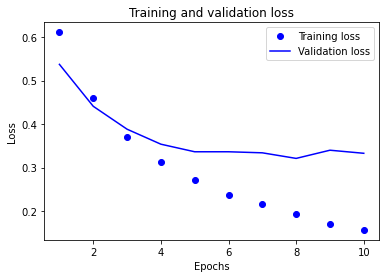

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,11)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

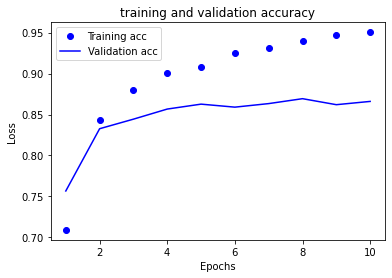

In [16]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfitting at the fourth epochs. I'll train a new network from scratch for four epochs and then evaluate it on the test data.

In [20]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=128)
results = model.evaluate(x_test, y_test)

Epoch 1/4
79/79 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.8023
Epoch 2/4
79/79 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.8928
Epoch 3/4
79/79 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9154
Epoch 4/4
313/313 [==============================] - 1s 868us/step - loss: 0.3383 - accuracy: 0.8672


### Multiclass classification example (IMDB sentiment analysis).

Here I'll build a network to classify Reuters newswires into 46 mutually exclusive topics.

In [1]:
from keras.datasets import reuters


In [2]:
(train_data, y_train), (test_data, test_labels) =  reuters.load_data(num_words=3000)

2121728/2110848 [==============================] - 10s 5us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[10]])

In [18]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for  i, label in enumerate(labels):
        results[i,label] =1
    return results

In [19]:
ont_hot_train_labels = to_one_hot(y_train)
ont_hot_test_labels = to_one_hot(test_labels)

In [25]:
x_train = x_train[0:10000]
y_train = ont_hot_train_labels[0:10000]
x_test = x_test[0:10000]
y_test = ont_hot_test_labels[0:10000]

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(3000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer = 'rmsprop', 
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [36]:
history = model.fit(partial_x_train,partial_y_train, epochs = 10, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/10
63/63 [==============================] - 1s 6ms/step - loss: 1.8809 - accuracy: 0.6030 - val_loss: 1.2550 - val_accuracy: 0.7210
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 1.0464 - accuracy: 0.7720 - val_loss: 1.0433 - val_accuracy: 0.7760
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.7680 - accuracy: 0.8289 - val_loss: 0.9124 - val_accuracy: 0.8060
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.8727 - val_loss: 0.8587 - val_accuracy: 0.8110
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.9010 - val_loss: 0.8884 - val_accuracy: 0.8010
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9223 - val_loss: 0.8498 - val_accuracy: 0.8140
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.2889 - accuracy: 0.9340 - val_loss: 0.8905 - val_accuracy: 0.8190
Epoch 8/10
63/63 [==

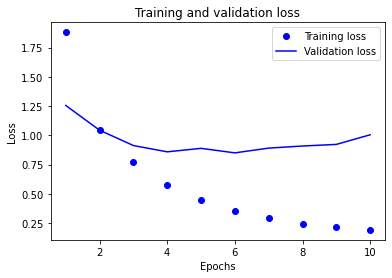

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,11)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

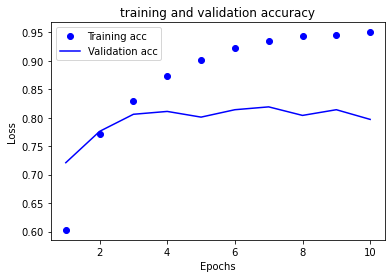

In [38]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predicting house prices:  a regression example.
I'll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate and so on.

In [39]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 2us/step


In [40]:
train_data.shape

(404, 13)

In [41]:
test_data.shape

(102, 13)

In [42]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [45]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',loss='mse', metrics = ['mae'])
    
    return model

In [101]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 400
all_mae_history = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis =0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data,val_targets), epochs = num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [102]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

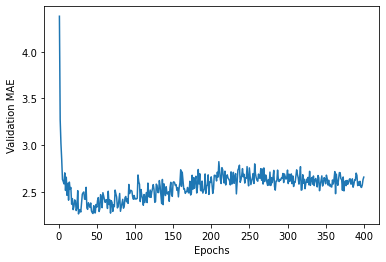

In [103]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [104]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

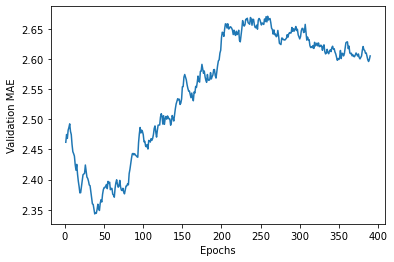

In [105]:
plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [114]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose =0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 954us/step - loss: 17.1628 - mae: 2.5311


In [115]:
test_mae_score

2.5310819149017334